In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [4]:
#import fashion data
fashion = keras.datasets.fashion_mnist
(train_i , train_l),(test_i , test_l) = fashion.load_data()

4423680/4422102 [==============================] - 22s 5us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#Data Exploration
print(train_i.shape)
print(train_l.shape)
print(test_i.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


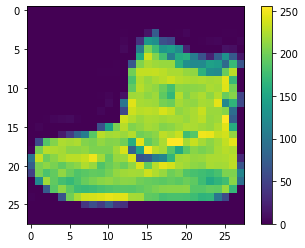

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
plt.figure()
plt.imshow(train_i[0])
plt.colorbar()
plt.show()
train_i[0]

In [21]:
train_i = train_i/255
test_i = test_i/255
train_i[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

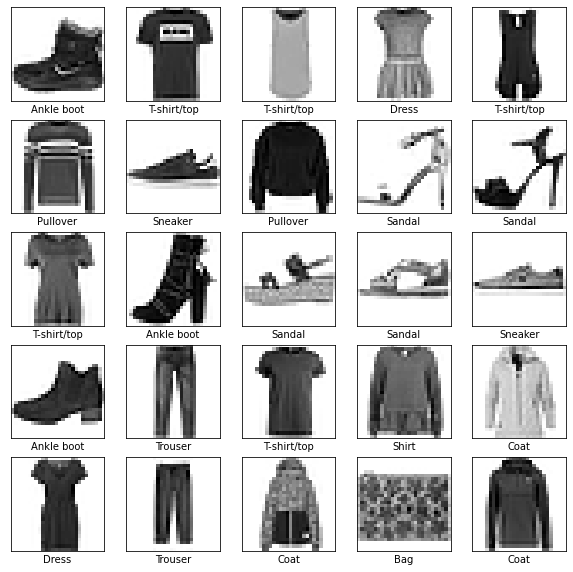

In [24]:
#show 25 images just to check format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_i[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_l[i]])
plt.show()

In [25]:
#setup model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_i, train_l, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4998 - accuracy: 0.8248
Epoch 2/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3707 - accuracy: 0.8652
Epoch 3/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3327 - accuracy: 0.8783
Epoch 4/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3110 - accuracy: 0.8849
Epoch 5/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2936 - accuracy: 0.8920
Epoch 6/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2803 - accuracy: 0.8949
Epoch 7/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2664 - accuracy: 0.9007
Epoch 8/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2570 - accuracy: 0.9042
Epoch 9/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2471 - accuracy: 0.9086
Epoch 10/50
60

In [29]:
test_loss, test_acc = model.evaluate(test_i,  test_l, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.5169 - accuracy: 0.8908

Test accuracy: 0.8908


In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_i)
predictions[0]

array([5.4128700e-27, 2.5880411e-22, 1.3139448e-21, 2.0202964e-28,
       8.1582966e-26, 7.1343570e-11, 5.5155054e-19, 4.5601611e-09,
       1.0390805e-18, 1.0000000e+00], dtype=float32)

In [32]:
test_l[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

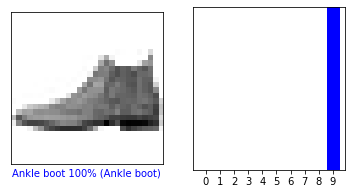

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_l, test_i)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_l)
plt.show()

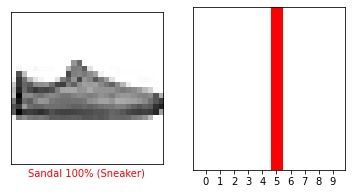

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_l, test_i)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_l)
plt.show()

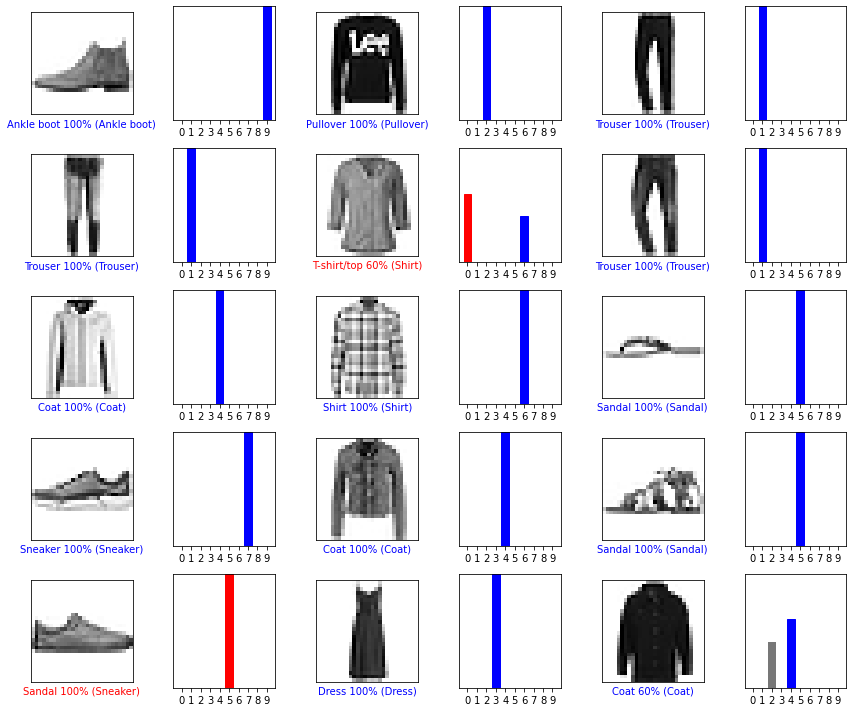

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_l, test_i)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_l)
plt.tight_layout()
plt.show()

In [40]:
# Grab an image from the test dataset.
img = test_i[1]

print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0834768e-06 2.1792849e-22 9.9997807e-01 3.0539379e-25 2.0870517e-05
  2.8374114e-25 2.0501000e-08 2.8966814e-29 2.1333632e-21 8.6088670e-34]]


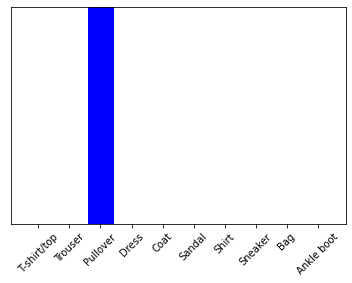

In [44]:
plot_value_array(1, predictions_single[0], test_l)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
np.argmax(predictions_single[0])

2